In [7]:
!git clone https://github.com/jesseanddd/fitbit.git

fatal: destination path 'fitbit' already exists and is not an empty directory.


In [8]:
# fitbit  
!get clone https://github.com/jesseanddd/fitbit.git

In [9]:
!pip install openpyxl --upgrade


# Data Preperation

## Import Libraries

In [1]:
import numpy as np
import os
import pandas as pd
import json

## Get Participation List

In [2]:


def get_pl(path_xls):
    """
    this is output
    ['p01',
    'p02',
    'p03',
    'p04',
    'p05',
    'p06',
    'p07',
    'p08',
    'p09',
    'p10',
    'p11',
    'p12',
    'p13',
    'p14',
    'p15',
    'p16']
    """
    dfs = pd.read_excel(path_xls, sheet_name=None)
    return list(dfs["Sheet1"]["Unnamed: 0"])[1:]


# JSON TO CSV

In [3]:

def json_to_csv():
    for pars in get_pl("pmdata/participant-overview.xlsx"):
        print("participant ",pars)
        for files in os.listdir(f'pmdata/{pars}/fitbit/'):
            if files!='sleep_score.csv':
                print("File Name", files)
                with open(f'pmdata/{pars}/fitbit/{files}') as f:
                    data = json.load(f)
                df = pd.json_normalize(data)
                print(df.head())
                df.to_csv(f'pmdata/{pars}/fitbit/{files[:-4]}csv')

In [ ]:
json_to_csv()

## Train and Test CSV Files

In [6]:
#datetime zero row
correct_files=['heart_rate.csv','calories.csv','steps.csv','distance.csv','sleep_score.csv']
other_files=['exercise.csv','sleep.csv','lightly_active_minutes.csv','moderately_active_minutes.csv','resting_heart_rate.csv','sedentary_minutes.csv','time_in_heart_rate_zones.csv','very_active_minutes.csv']
def get_df(dir,participant_list,prediction_time,obs_time,test_size):
    """ 
    store the rows for training and testing
    """
    
    files_train_row = {
      "heart_rate.csv": [], 
      "calories.csv": [], 
      "steps.csv": [],
      "distance.csv": [],
      "sleep_score.csv": []
    }

    files_test_row = {
      "heart_rate.csv": [], 
      "calories.csv": [], 
      "steps.csv": [],
      "distance.csv": [],
      "sleep_score.csv": []
    }
    os.makedirs(f"pmdata/{participant_list}/fitbit/processed",exist_ok=True)

    if( (prediction_time >=0 and prediction_time <=24) and (prediction_time-obs_time >=0 and prediction_time-obs_time <=24) and (test_size>=0 and test_size<=1)):
        print("yes")
        col="dateTime"
        x1=11
        y1=13
        for file in correct_files:
            print("File : ", file)
            df=pd.read_csv(f'{dir}/{participant_list}/fitbit/{file}')
            if file == 'sleep_score.csv':
                col ="timestamp"
            print(len(df))
            print(range(len(df)))
            for r in range(len(df)):
                #print(r)
                #print(int(df[col][r][x1:y1]))
                if int(df[col][r][x1:y1])==prediction_time :
                    files_train_row[file].append(r)                
                if int(df[col][r][x1:y1])<prediction_time and int(df[col][r][x1:y1])>=prediction_time-obs_time:
                      files_test_row[file].append(r)
            df[col] = pd.to_datetime(df[col])
    # extract hour from the timestamp column to create an time_hour column
            df[col] = df[col].dt.hour
            df.loc[list(files_train_row[file])].to_csv(f'{dir}/{participant_list}/fitbit/processed/Train_{file}',index=False)
            df.loc[list(files_test_row[file])].to_csv(f'{dir}/{participant_list}/fitbit/processed/Test_{file}',index=False)           



In [21]:
participants = ['p01','p02',
    'p03',
    'p04',
    'p05',
    'p06',
    'p07',
    ]

In [36]:
pwd

'/Users/hassan/Desktop/Study/BDS2/as2'

In [7]:


for participant in participants:
    get_df("pmdata",participant,7,1,0.2)

yes
File :  heart_rate.csv
1472629
range(0, 1472629)
File :  calories.csv
218880
range(0, 218880)
File :  steps.csv
107326
range(0, 107326)
File :  distance.csv
107326
range(0, 107326)
File :  sleep_score.csv
138
range(0, 138)
yes
File :  heart_rate.csv
808341
range(0, 808341)
File :  calories.csv
218880
range(0, 218880)
File :  steps.csv
53042
range(0, 53042)
File :  distance.csv
53042
range(0, 53042)
File :  sleep_score.csv
74
range(0, 74)
yes
File :  heart_rate.csv
1571315
range(0, 1571315)
File :  calories.csv
218473
range(0, 218473)
File :  steps.csv
86457
range(0, 86457)
File :  distance.csv
86457
range(0, 86457)
File :  sleep_score.csv
140
range(0, 140)
yes
File :  heart_rate.csv
1370967
range(0, 1370967)
File :  calories.csv
218880
range(0, 218880)
File :  steps.csv
111231
range(0, 111231)
File :  distance.csv
111231
range(0, 111231)
File :  sleep_score.csv
117
range(0, 117)
yes
File :  heart_rate.csv
1579882
range(0, 1579882)
File :  calories.csv
218880
range(0, 218880)
File :

## Merge CSV Files

In [3]:
for file in correct_files:
    print(file)

heart_rate.csv
calories.csv
steps.csv
distance.csv
sleep_score.csv


In [8]:
df1.head()

,Unnamed: 0,dateTime,value
0,420,7,4.45
1,421,7,5.28
2,422,7,5.00
3,423,7,3.89
4,424,7,1.39


In [10]:
""" 
pd.merge(df1.head(),df2.head(),how='r')
dfs = []
for i in range(13):
    df = ... # However it is that you create your dataframes   
    dfs.append(df)


df1.append(df2)

"""


,Unnamed: 0,dateTime,value
0,420,7,4.45
1,421,7,5.28
2,422,7,5.00
3,423,7,3.89
4,424,7,1.39
...,...,...,...
9115,217855,6,1.38
9116,217856,6,1.38
9117,217857,6,1.38
9118,217858,6,1.38


# Calibration Size

## tsai

In [8]:
from tsai.all import *

## Apply RLE

In [9]:

""" 
correct_files
df1 = pd.read_csv("pmdata/p01/fitbit/processed/Train_calories.csv")
df2 = pd.read_csv("pmdata/p01/fitbit/processed/Test_calories.csv")  
dfs = []
dfs.append(df1)
dfs.append(df2)
df = pd.concat(dfs)
"""


def apply_rle(df,wl,strd):

    #df = pd.read_csv("pmdata/p01/fitbit/processed/Train_calories.csv")
    X = df2xy(df,sample_col=None,feat_col=None)
    X=X[0].reshape(X[0].shape[0],X[0].shape[2])
    window_length = wl
    stride = strd
    n_vars = 3
    t = X
    print(t.shape)
    plt.plot(t)
    plt.show()
    #print(range(0,t.shape[1]))

    print(list(range(0,t.shape[1])))
    X,y= SlidingWindow(window_length, stride=stride,get_x=list(range(0,t.shape[1])),get_y=0)(t)
    return X

## Train Data

(67071, 4)


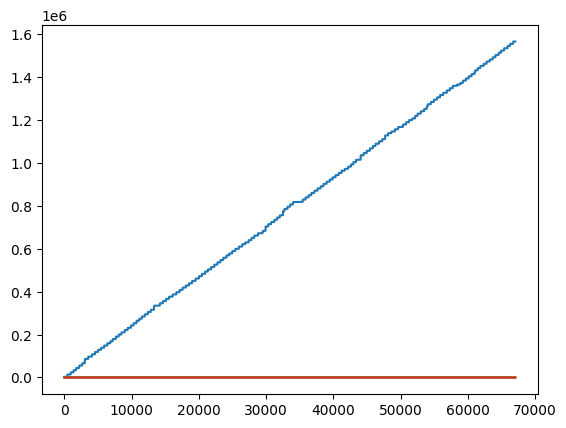

[0, 1, 2, 3]
(9120, 3)


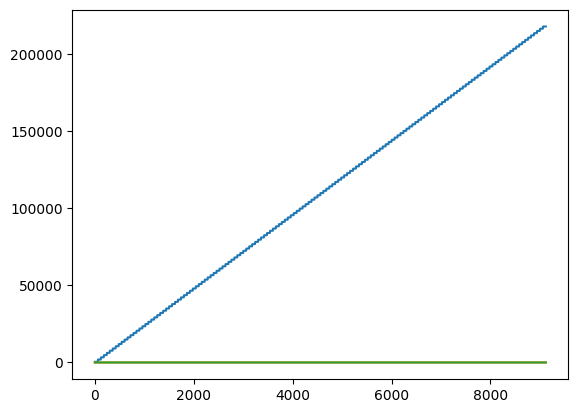

[0, 1, 2]
(9147, 3)


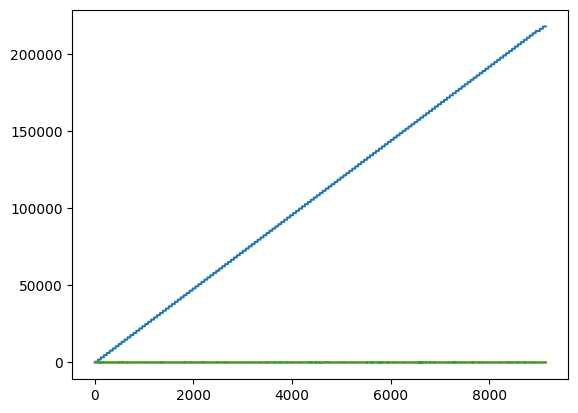

[0, 1, 2]
(9147, 3)


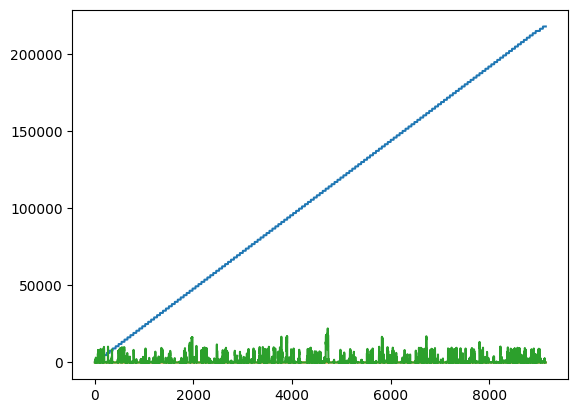

[0, 1, 2]
(41, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(59062, 4)


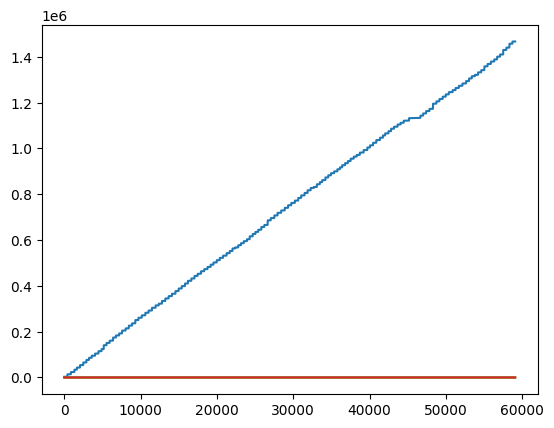

[0, 1, 2, 3]
(9120, 3)


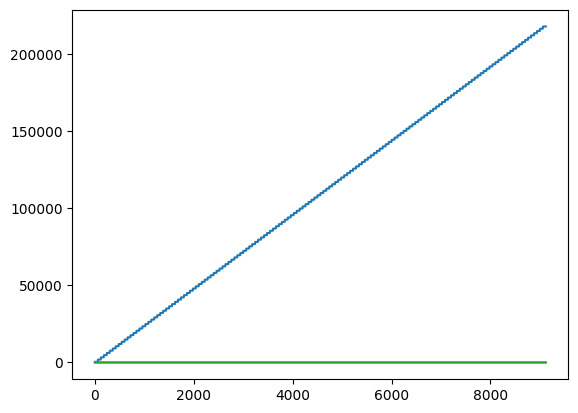

[0, 1, 2]
(5228, 3)


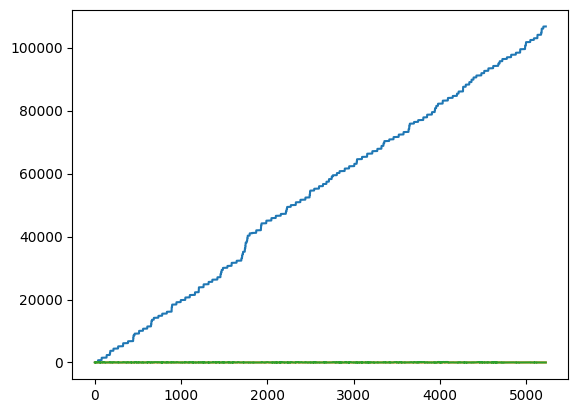

[0, 1, 2]
(5228, 3)


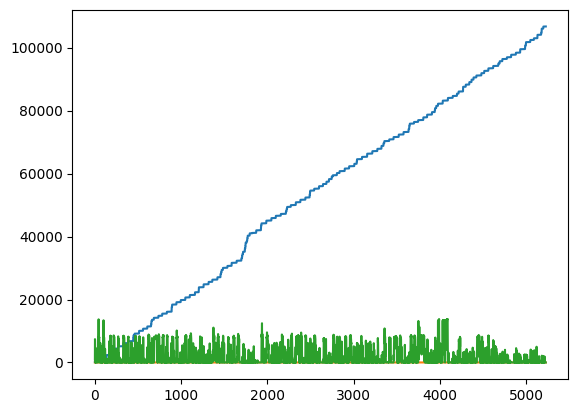

[0, 1, 2]
(29, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(43475, 4)


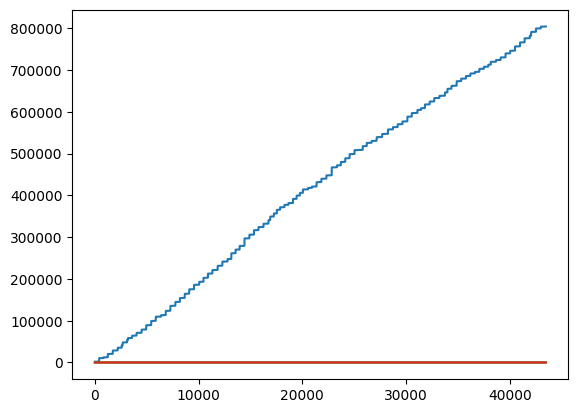

[0, 1, 2, 3]
(9120, 3)


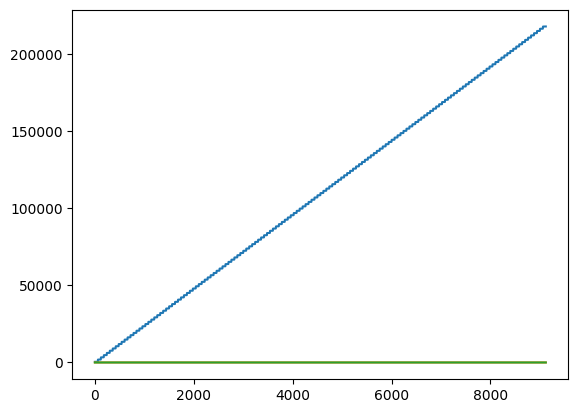

[0, 1, 2]
(2952, 3)


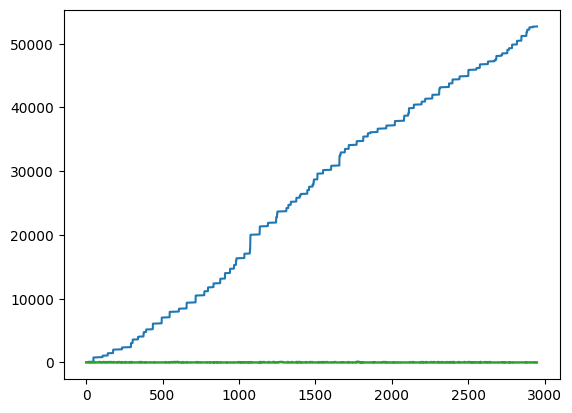

[0, 1, 2]
(2952, 3)


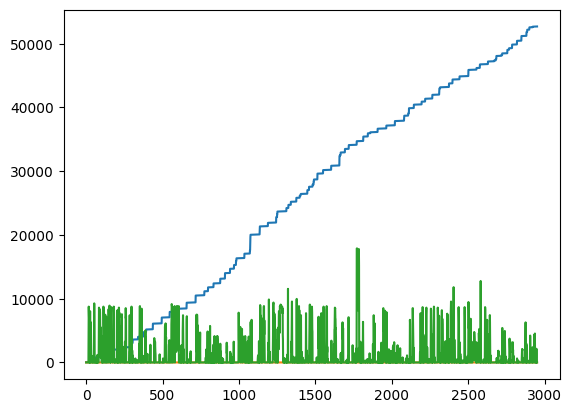

[0, 1, 2]
(21, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(66172, 4)


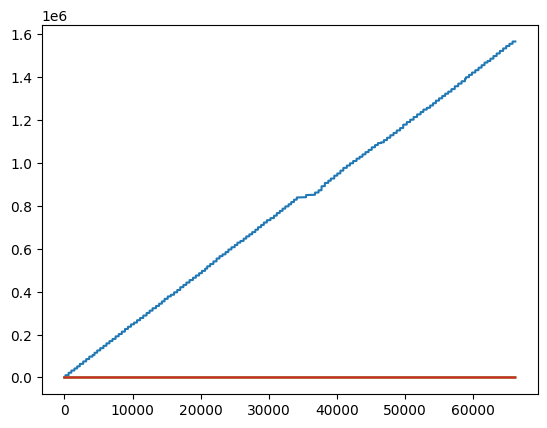

[0, 1, 2, 3]
(9120, 3)


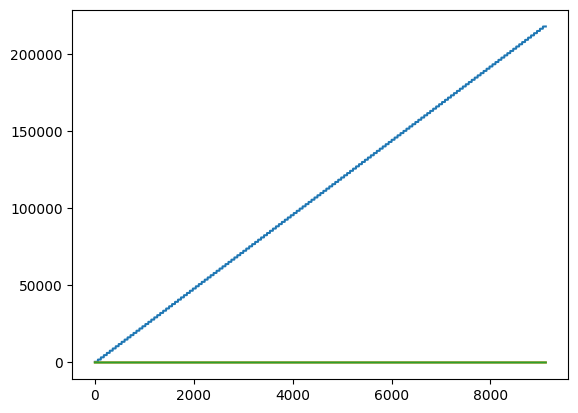

[0, 1, 2]
(4407, 3)


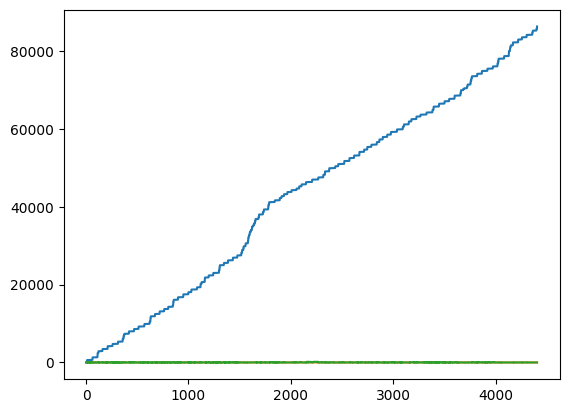

[0, 1, 2]
(4407, 3)


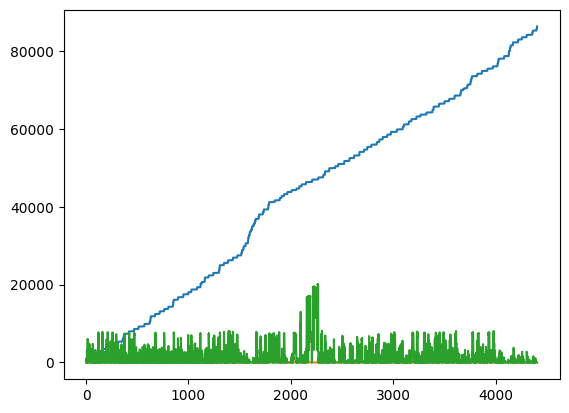

[0, 1, 2]
(19, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(57337, 4)


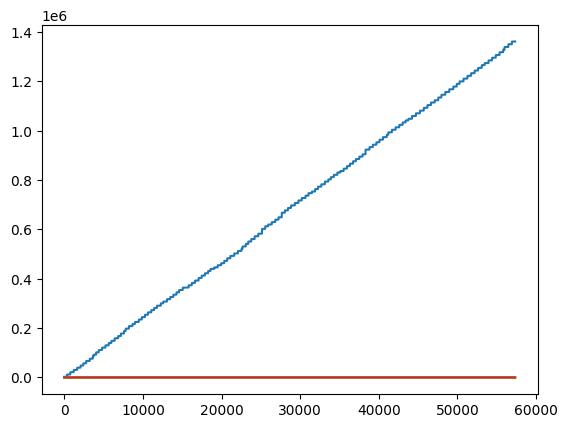

[0, 1, 2, 3]
(9120, 3)


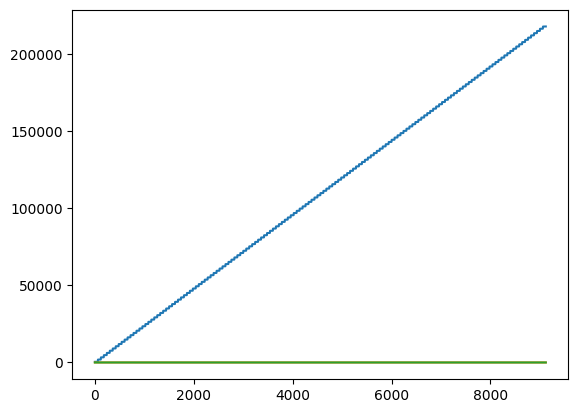

[0, 1, 2]
(5627, 3)


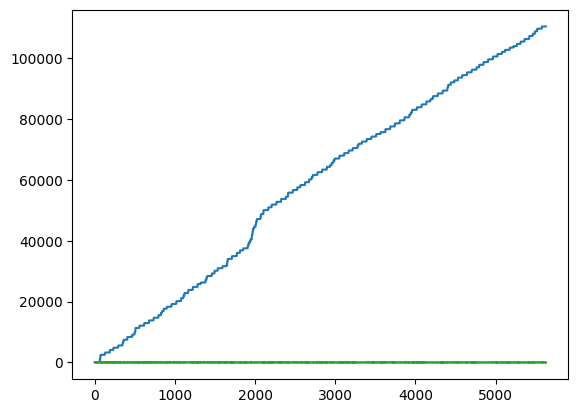

[0, 1, 2]
(5627, 3)


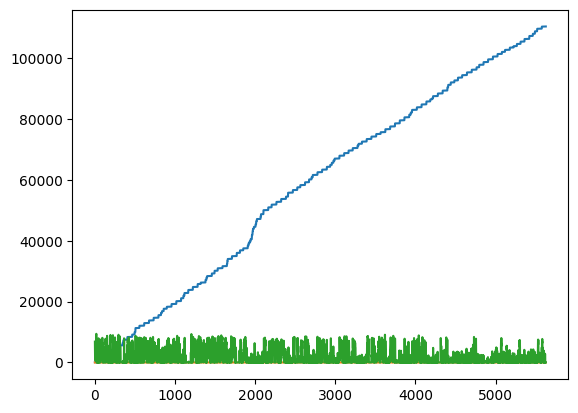

[0, 1, 2]
(18, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(67370, 4)


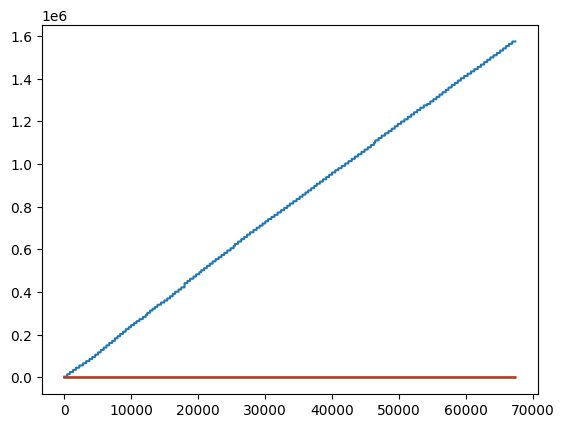

[0, 1, 2, 3]
(9120, 3)


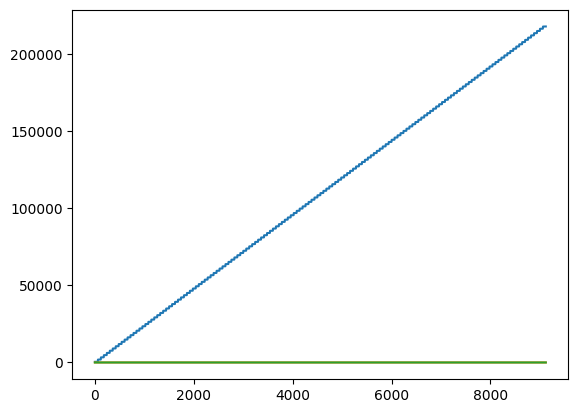

[0, 1, 2]
(6263, 3)


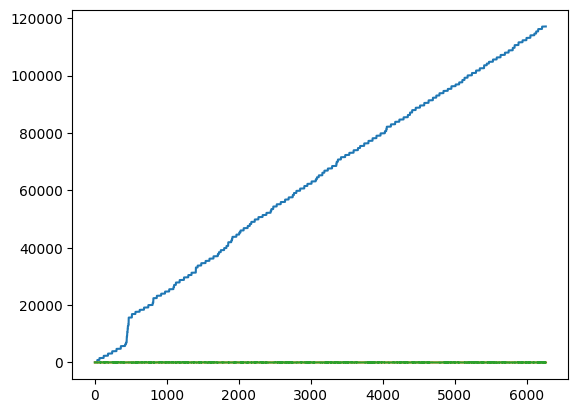

[0, 1, 2]
(6263, 3)


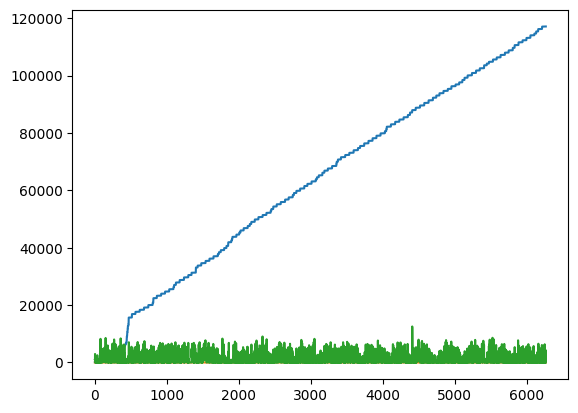

[0, 1, 2]
(30, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(59084, 4)


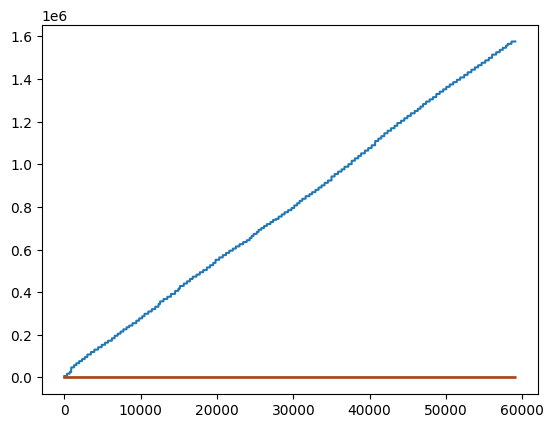

[0, 1, 2, 3]
(8880, 3)


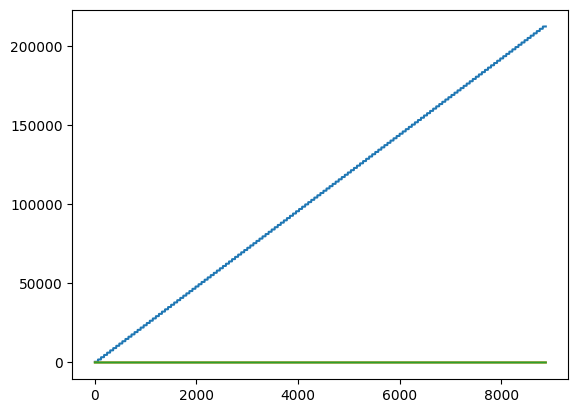

[0, 1, 2]
(4346, 3)


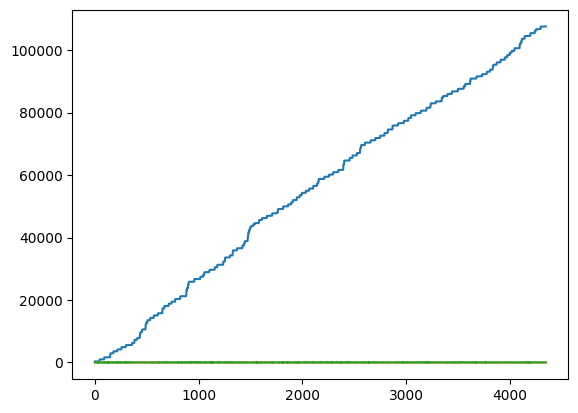

[0, 1, 2]
(4346, 3)


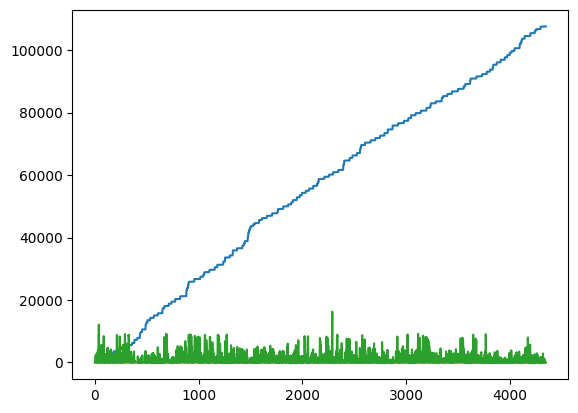

[0, 1, 2]
(46, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [22]:
Train_X =[]
Train_Y =[]
for participant in participants:
    for file in correct_files:
        df = pd.read_csv(f"pmdata/{participant}/fitbit/processed/Train_{file}")
        if file == 'sleep_score.csv':
            X = df2xy(df,sample_col=None,feat_col=None)
            X=X[0].reshape(X[0].shape[0],X[0].shape[2])
            window_length = 5
            stride = 2
            n_vars = 3
            t = X
            print(t.shape)

            print(list(range(0,t.shape[1])))
            X,y= SlidingWindow(window_length, stride=stride,get_x=list(range(0,t.shape[1])),get_y=2)(t)
        
            Train_Y.append(y)
        else:
            Train_X.append(apply_rle(df,5,2))

In [23]:
Train_Y[0]

array([72., 80., 74., 78., 78., 78., 71., 80., 71., 74., 72., 69., 68.,
       82., 74., 73., 71., 67.])

## Test Data

(69174, 4)


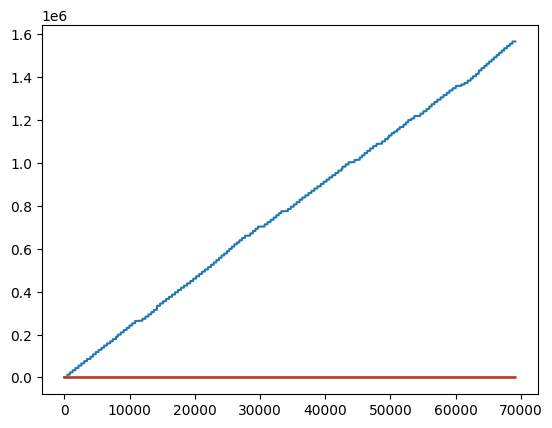

[0, 1, 2, 3]
(9120, 3)


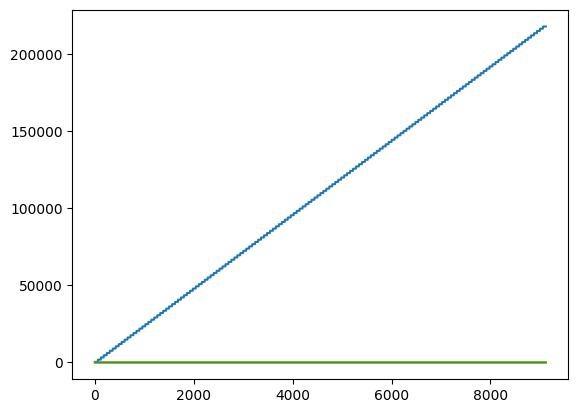

[0, 1, 2]
(9125, 3)


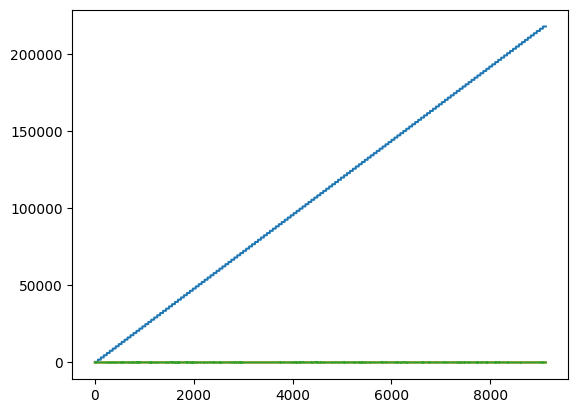

[0, 1, 2]
(9125, 3)


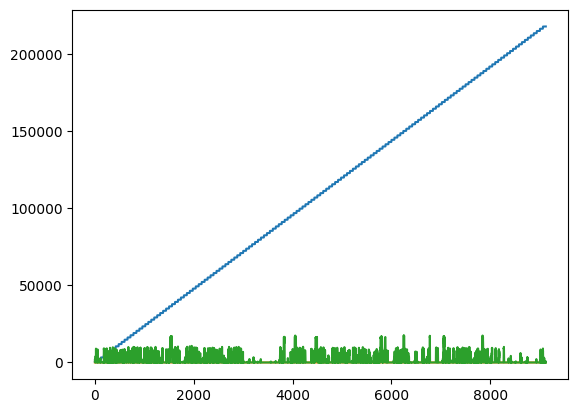

[0, 1, 2]
(83, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(57027, 4)


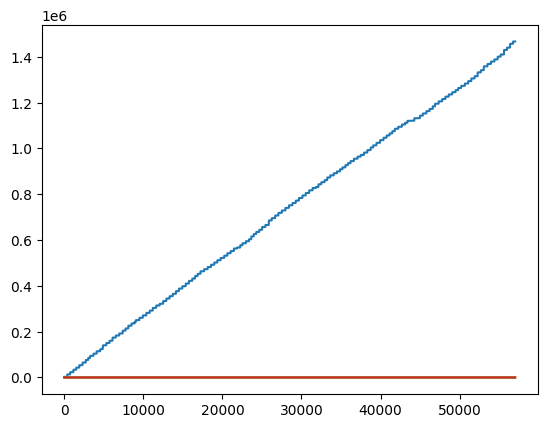

[0, 1, 2, 3]
(9120, 3)


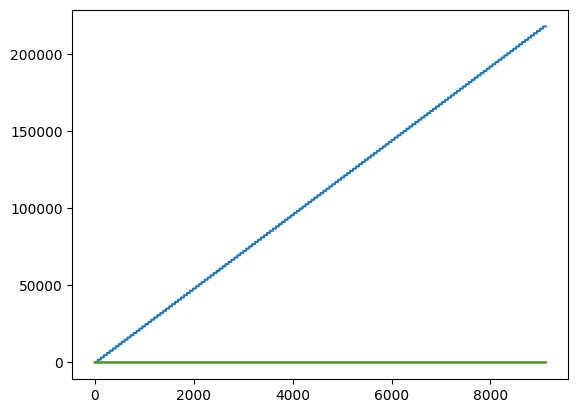

[0, 1, 2]
(4254, 3)


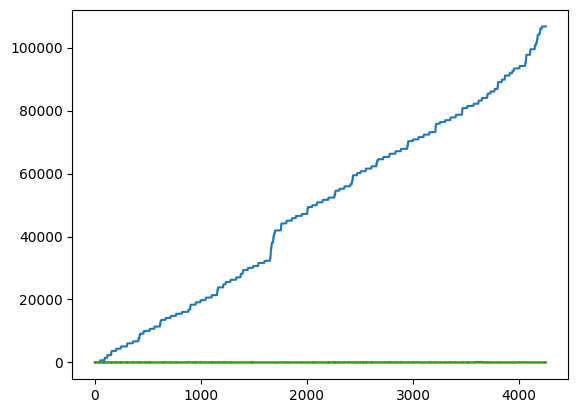

[0, 1, 2]
(4254, 3)


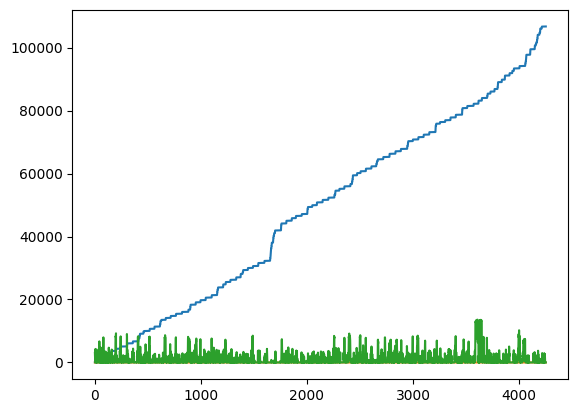

[0, 1, 2]
(59, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(43746, 4)


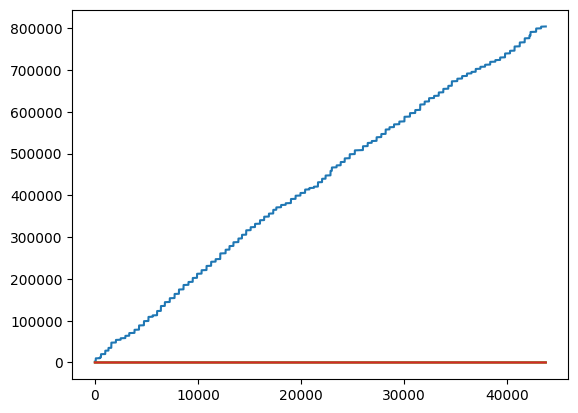

[0, 1, 2, 3]
(9120, 3)


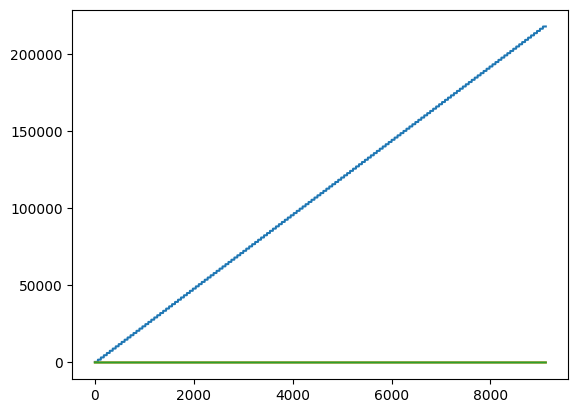

[0, 1, 2]
(2031, 3)


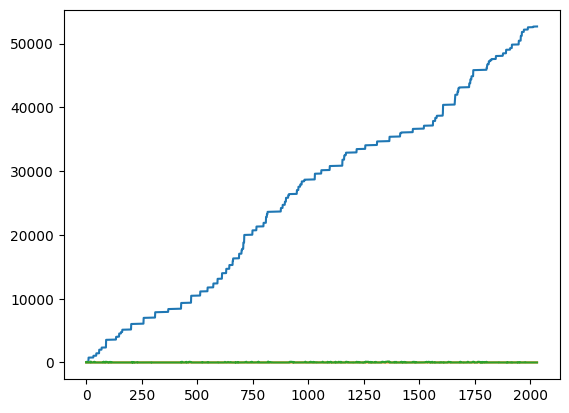

[0, 1, 2]
(2031, 3)


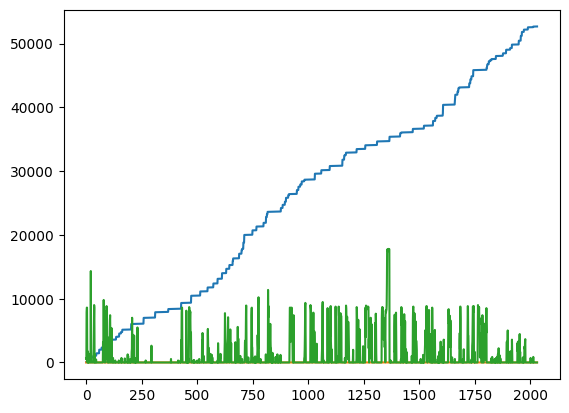

[0, 1, 2]
(18, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(64030, 4)


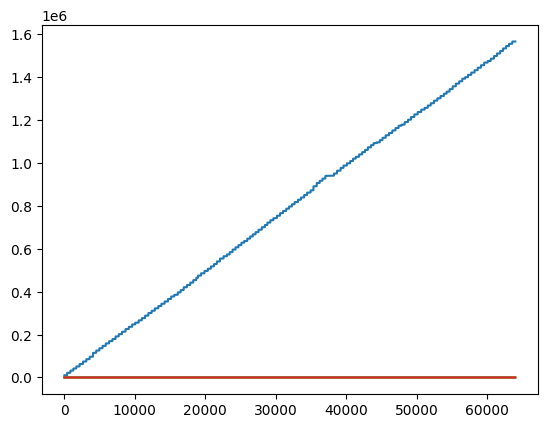

[0, 1, 2, 3]
(9120, 3)


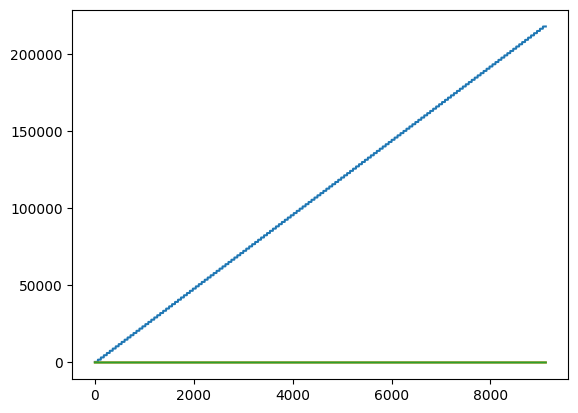

[0, 1, 2]
(3299, 3)


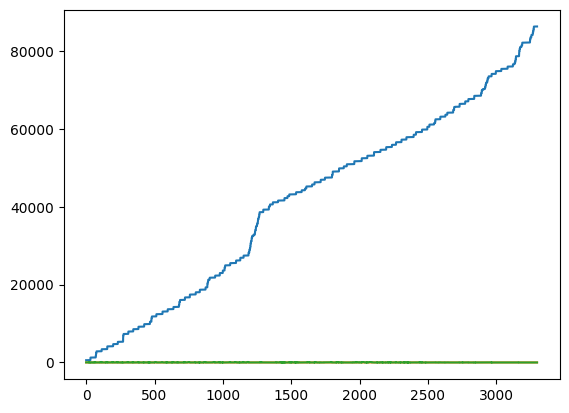

[0, 1, 2]
(3299, 3)


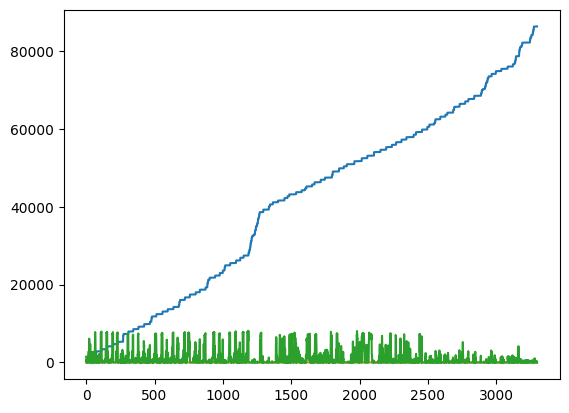

[0, 1, 2]
(54, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(57549, 4)


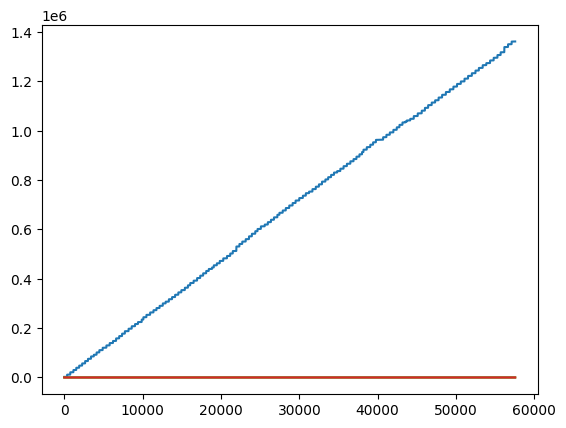

[0, 1, 2, 3]
(9120, 3)


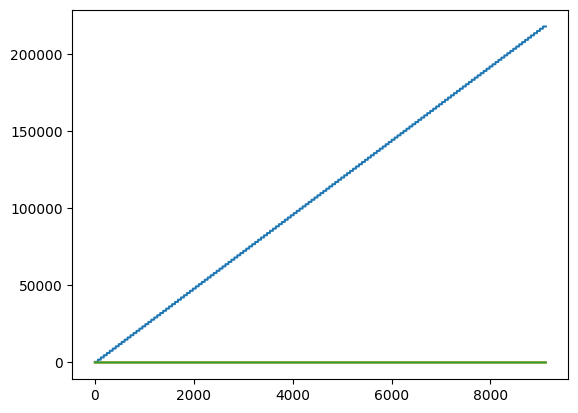

[0, 1, 2]
(4272, 3)


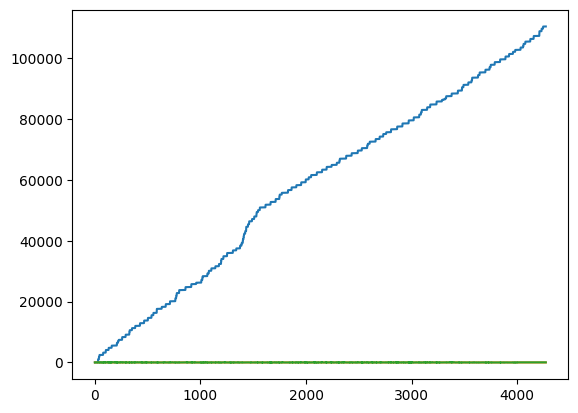

[0, 1, 2]
(4272, 3)


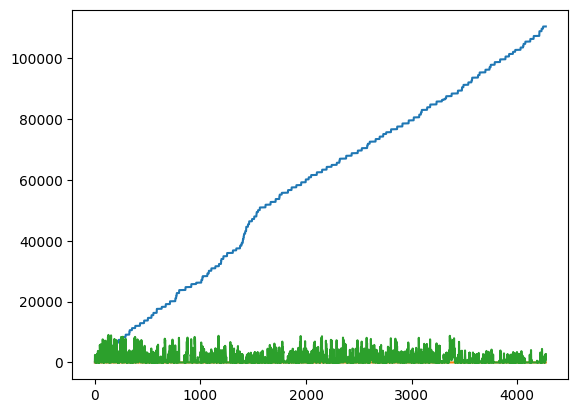

[0, 1, 2]
(62, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(72701, 4)


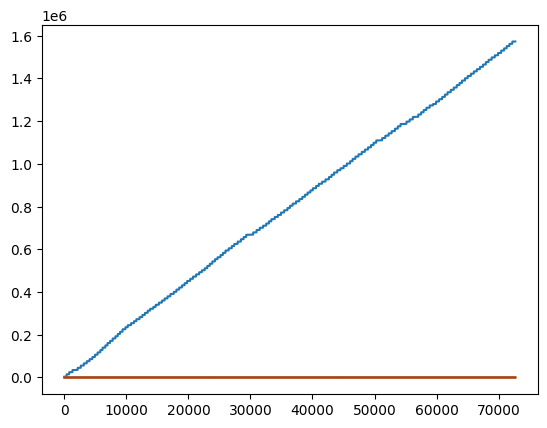

[0, 1, 2, 3]
(9120, 3)


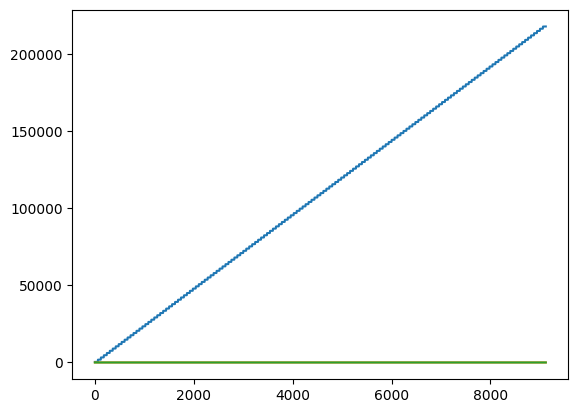

[0, 1, 2]
(5739, 3)


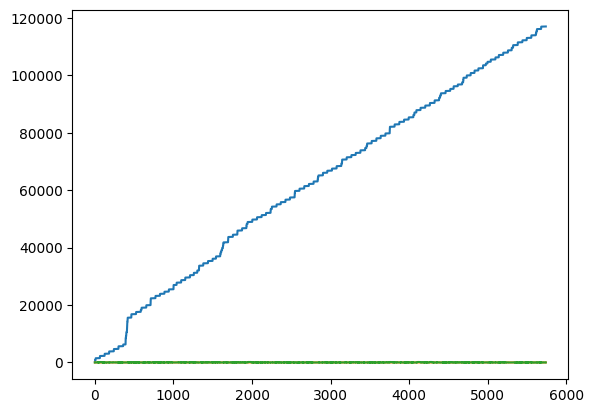

[0, 1, 2]
(5739, 3)


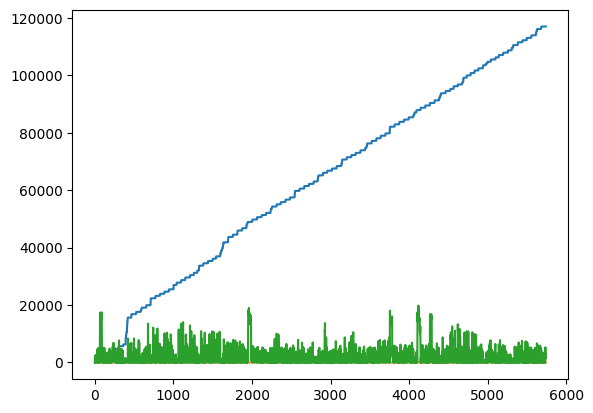

[0, 1, 2]
(76, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(61321, 4)


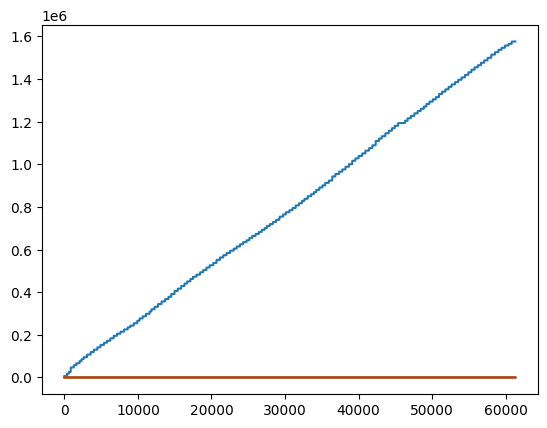

[0, 1, 2, 3]
(8880, 3)


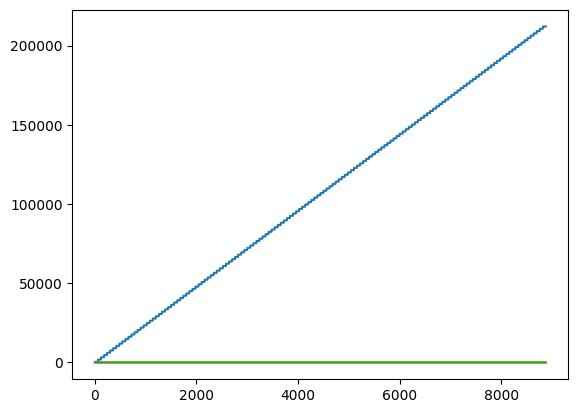

[0, 1, 2]
(2459, 3)


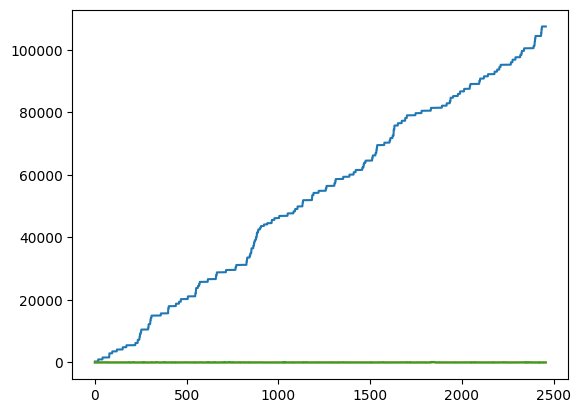

[0, 1, 2]
(2459, 3)


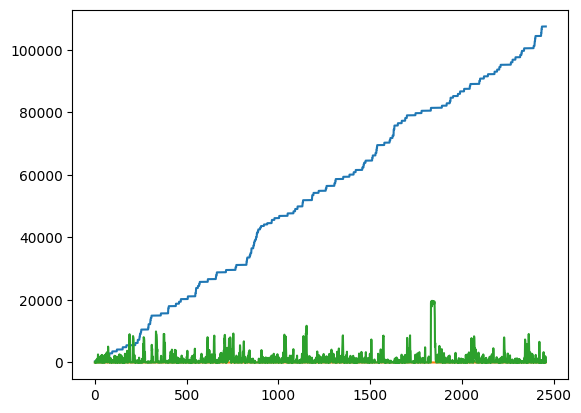

[0, 1, 2]
(29, 9)
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [24]:
Test_X =[]
Test_Y =[]
for participant in participants:
    for file in correct_files:
        df = pd.read_csv(f"pmdata/{participant}/fitbit/processed/Test_{file}")
        if file == 'sleep_score.csv':
            X = df2xy(df,sample_col=None,feat_col=None)
            X=X[0].reshape(X[0].shape[0],X[0].shape[2])
            window_length = 5
            stride = 2
            n_vars = 3
            t = X
            print(t.shape)

            print(list(range(0,t.shape[1])))
            X,y= SlidingWindow(window_length, stride=stride,get_x=list(range(0,t.shape[1])),get_y=2)(t)
                
            Test_Y.append(y)
        else:
            Test_X.append(apply_rle(df,5,2))

## Check Train and Test Sizes

In [25]:
len(Train_X)

28

In [26]:
print("Train Sizes ")
for k in range(len(Train_X)):
    print(f'File Name : {correct_files[k]} ' ,Train_X[k].shape)

Train Sizes 
File Name : heart_rate.csv  (33533, 4, 5)
File Name : calories.csv  (4558, 3, 5)
File Name : steps.csv  (4571, 3, 5)
File Name : distance.csv  (4571, 3, 5)
File Name : sleep_score.csv  (29529, 4, 5)


IndexError: list index out of range

In [27]:
print("Train Target Sizes ")
for k in range(len(Train_Y)):
    print(f'File Name : sleep_score.csv ' ,Train_Y[k].shape)

Train Target Sizes 
File Name : sleep_score.csv  (18,)
File Name : sleep_score.csv  (12,)
File Name : sleep_score.csv  (8,)
File Name : sleep_score.csv  (7,)
File Name : sleep_score.csv  (7,)
File Name : sleep_score.csv  (13,)
File Name : sleep_score.csv  (21,)


In [28]:
print("Test Sizes ")
for k in range(len(Test_X)):
    print(f'File Name : {correct_files[k]} ' ,Test_X[k].shape)

Test Sizes 
File Name : heart_rate.csv  (34585, 4, 5)
File Name : calories.csv  (4558, 3, 5)
File Name : steps.csv  (4560, 3, 5)
File Name : distance.csv  (4560, 3, 5)
File Name : sleep_score.csv  (28511, 4, 5)


IndexError: list index out of range

In [29]:
print("Test Sizes ")
for k in range(len(Test_Y)):
    print(f'File Name : sleep_score.csv ' ,Test_Y[k].shape)

Test Sizes 
File Name : sleep_score.csv  (39,)
File Name : sleep_score.csv  (27,)
File Name : sleep_score.csv  (7,)
File Name : sleep_score.csv  (25,)
File Name : sleep_score.csv  (29,)
File Name : sleep_score.csv  (36,)
File Name : sleep_score.csv  (12,)


## Randomly Selection of Data between [0,1]

In [18]:
from random import *



### Prepare Train

In [19]:
def prepare_Train_with_Calib(cal_size,Train_X,Train_Y):
    """ 
    """
    target_Train_Size = int(Train_Y[0].shape[0]*cal_size) 
    print(f"Total {target_Train_Size} rows are selected from : sleep_score.csv")

    Train_X_rand = []
    Train_Y_rand = []

    for k in range(len(Train_X)):
        seed(0)
        L_size = target_Train_Size
        L = [ randint(1,Train_X[k].shape[0]) for i in range(L_size) ]
        Train_X_rand.append(Train_X[k][L,:,:])
    seed(0)
    L_size = target_Train_Size
    L = [ randint(1,Train_Y[0].shape[0]) for i in range(L_size) ]
    Train_Y_rand.append(Train_Y[0][L])
    return Train_X_rand, Train_Y_rand

In [35]:
Train_Y[1]

array([59., 72., 71., 73., 67., 76., 65., 76., 73., 66., 74., 62.])

In [239]:

train_X, train_Y=prepare_Train_with_Calib(0.5,Train_X,Train_Y)

Total 9 rows are selected from : sleep_score.csv


In [240]:
train_X[3].shape

(9, 3, 5)

In [241]:
type(train_X[3])

numpy.ndarray

In [242]:

train_Y[0].shape

(9,)

In [243]:
train_X[0].shape, train_X[1].shape

((9, 4, 5), (9, 3, 5))

### Join Column Wise Data

In [244]:
Joined_train_X=np.concatenate((train_X[0], train_X[1]), axis=1)
for k in range(2,len(train_X)):
    Joined_train_X=np.concatenate((Joined_train_X,train_X[k]),axis=1)
    print("Updated Shape : ",Joined_train_X.shape)

Updated Shape :  (9, 10, 5)
Updated Shape :  (9, 13, 5)


In [246]:
Joined_train_Y = train_Y[0]

In [245]:
Joined_train_X.shape

(9, 13, 5)

In [249]:
Joined_train_X.shape,Joined_train_Y.shape

((9, 13, 5), (9,))

### Prepare Test

In [251]:
def prepare_Test_with_Calib(cal_size,Test_X,Test_Y):
    """ 
    """
    target_Test_Size = int(Test_Y[0].shape[0]*cal_size) 
    print(f"Total {target_Test_Size} rows are selected from : sleep_score.csv")

    Test_X_rand = []
    Test_Y_rand = []

    for k in range(len(Test_X)):
        seed(0)
        L_size = target_Test_Size
        L = [ randint(1,Test_X[k].shape[0]) for i in range(L_size) ]
        Test_X_rand.append(Test_X[k][L,:,:])
    seed(0)
    L_size = target_Test_Size
    L = [ randint(1,Test_Y[0].shape[0]) for i in range(L_size) ]
    Test_Y_rand.append(Test_Y[0][L])
    return Test_X_rand, Test_Y_rand

In [252]:
test_X, test_Y=prepare_Test_with_Calib(0.5,Test_X,Test_Y)

Total 19 rows are selected from : sleep_score.csv


In [253]:
test_X[0].shape, test_X[1].shape

((19, 4, 5), (19, 3, 5))

### Join Column Wise Data

In [254]:
Joined_test_X=np.concatenate((test_X[0], test_X[1]), axis=1)
for k in range(2,len(test_X)):
    Joined_test_X=np.concatenate((Joined_test_X,test_X[k]),axis=1)
    print("Updated Shape : ",Joined_test_X.shape)

Updated Shape :  (19, 10, 5)
Updated Shape :  (19, 13, 5)


In [255]:
Joined_test_Y = test_Y[0]

In [256]:
Joined_test_X.shape

(19, 13, 5)

In [257]:
Joined_test_X.shape,Joined_test_Y.shape

((19, 13, 5), (19,))

## Final Check Shape of Train and Test

In [258]:
print(f'Train_X Shape : {Joined_train_X.shape}')
print(f'Train_Y Shape : {Joined_train_Y.shape}')
print(f'Test_X Shape : {Joined_test_X.shape}')
print(f'Test_Y Shape : {Joined_test_Y.shape}')

Train_X Shape : (9, 13, 5)
Train_Y Shape : (9,)
Test_X Shape : (19, 13, 5)
Test_Y Shape : (19,)


In [260]:
len(Joined_train_X)

9

## Apply Categorisation 
>(Regresstion to Class)

In [262]:
def apply_categorise(Data_Y):
    for k in range(0,len(Data_Y)):
        if(Data_Y[k]<=100 and Data_Y[k]>=90 ):
            Data_Y[k]=4
        elif(Data_Y[k]<=89 and Data_Y[k]>=80 ):
            Data_Y[k]=3
        elif(Data_Y[k]<=79 and Data_Y[k]>=60 ):
            Data_Y[k]=2
        else:
            Data_Y[k]=1
    return Data_Y

In [263]:
Joined_train_Y = apply_categorise(Joined_train_Y)

In [265]:
Joined_test_Y = apply_categorise(Joined_test_Y)

## Further

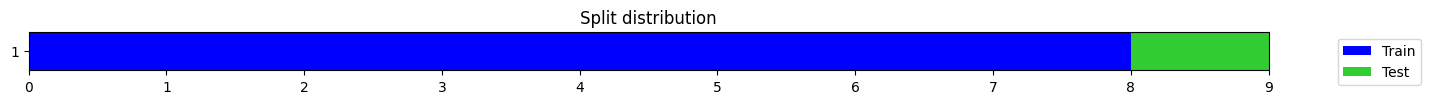

(#9) [(TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(1)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(0)), (TSTensor(vars:13, len:5, device=cpu, dtype=torch.float32), TensorCategory(0))] ...]

In [266]:
splits = get_splits(Joined_train_Y, valid_size=.2, stratify=True, random_state=23, shuffle=False)
tfms  = [None, [Categorize()]]
dsets = TSDatasets(Joined_train_X, Joined_train_Y, tfms=tfms, splits=splits, inplace=True)
dsets

In [267]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=2, batch_tfms=[TSStandardize()], num_workers=0)

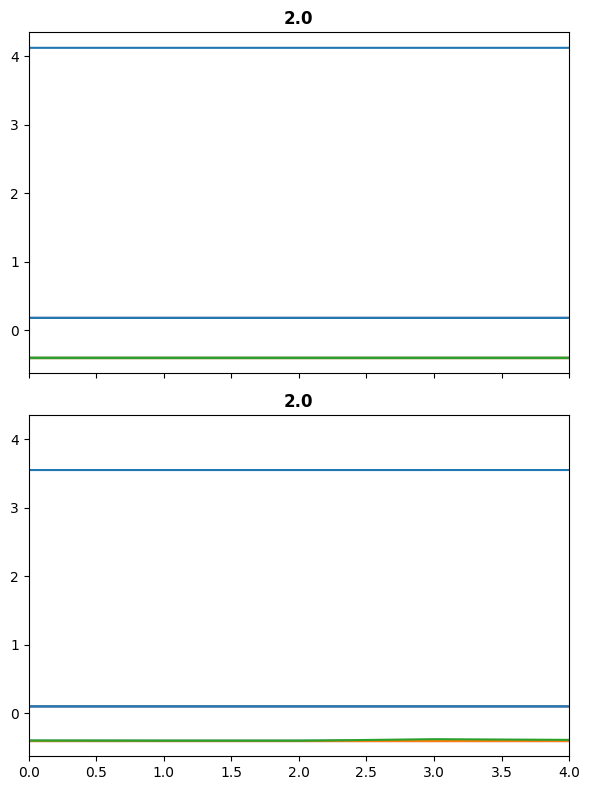

In [268]:
dls.show_batch(sharey=True)

In [269]:
model = InceptionTime(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage0')

Path('models/stage0.pth')

SuggestedLRs(valley=0.0002754228771664202)

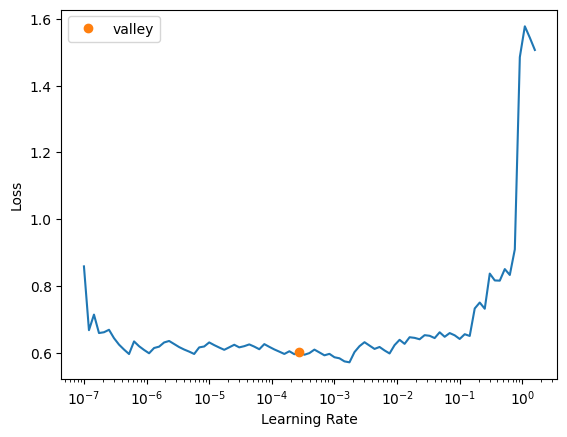

In [270]:
learn.load('stage0')
learn.lr_find()

In [271]:
learn.fit_one_cycle(25, lr_max=1e-3)
learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time
0,0.635751,0.621375,1.000000,00:00
1,0.602335,0.628199,1.000000,00:00
2,0.606813,0.625630,1.000000,00:00
3,0.570600,0.616675,1.000000,00:00
4,0.615438,0.596257,1.000000,00:00
5,0.583249,0.556467,1.000000,00:00
6,0.596580,0.514235,1.000000,00:00
7,0.594608,0.452770,1.000000,00:00
8,0.578431,0.457982,1.000000,00:00
9,0.574498,0.394290,1.000000,00:00


Path('models/stage1.pth')

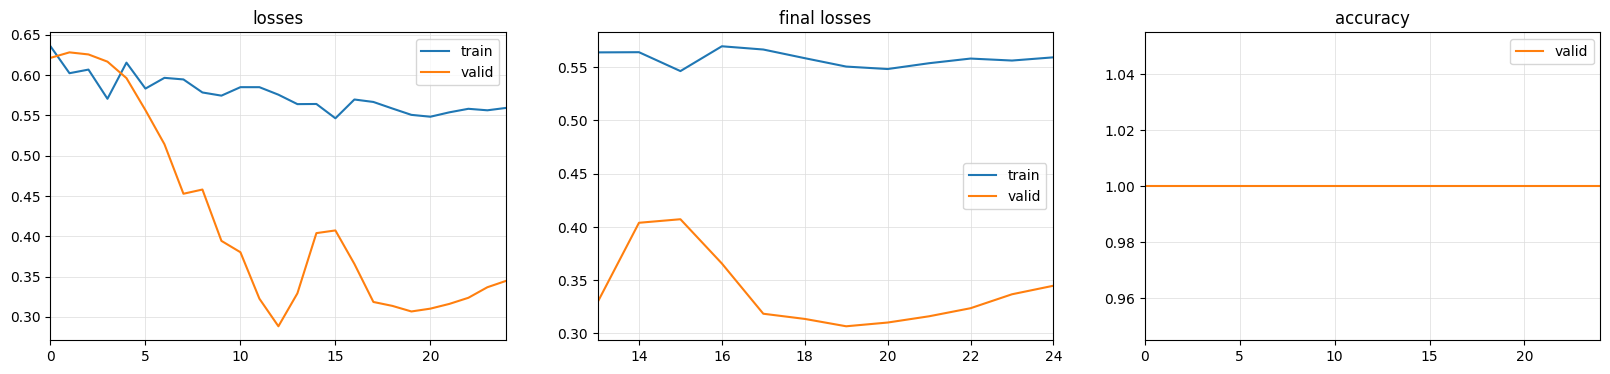

In [272]:
learn.recorder.plot_metrics()

In [273]:
learn.save_all(path='export', dls_fname='dls', model_fname='model', learner_fname='learner')

In [274]:
del learn, dsets, dls

In [275]:
learn = load_learner_all(path='export', dls_fname='dls', model_fname='model', learner_fname='learner')
dls = learn.dls
valid_dl = dls.valid
b = next(iter(valid_dl))
b

(TSTensor(samples:1, vars:13, len:5, device=cpu, dtype=torch.float32),
 TensorCategory([0]))

In [276]:
valid_probas, valid_targets, valid_preds = learn.get_preds(dl=valid_dl, with_decoded=True)
valid_probas, valid_targets, valid_preds

(tensor([[0.7084, 0.2916]]), tensor([0]), tensor([0]))

In [277]:
(valid_targets == valid_preds).float().mean()

tensor(1.)

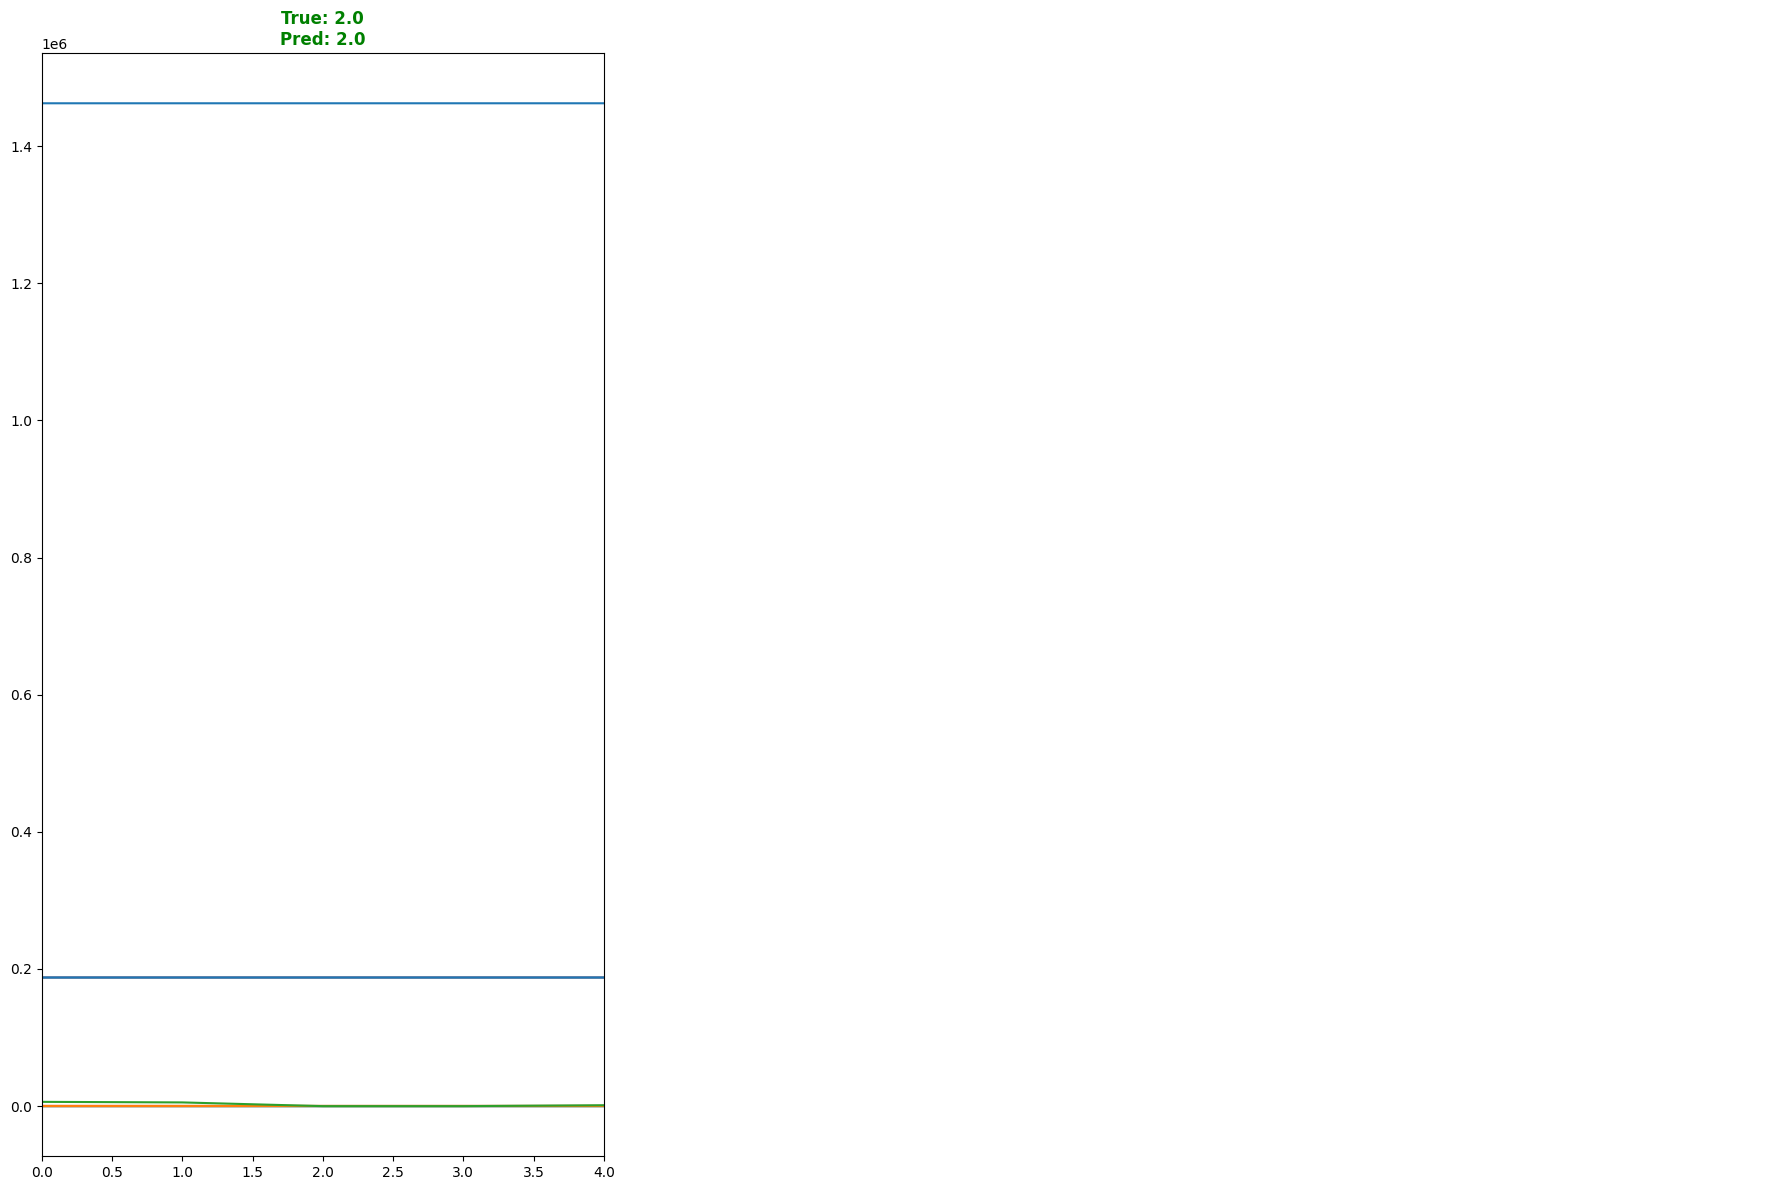

In [278]:
learn.show_results()

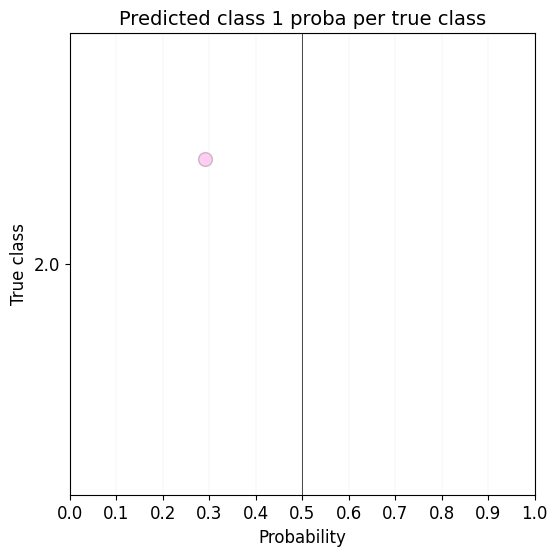

In [279]:
learn.show_probas()

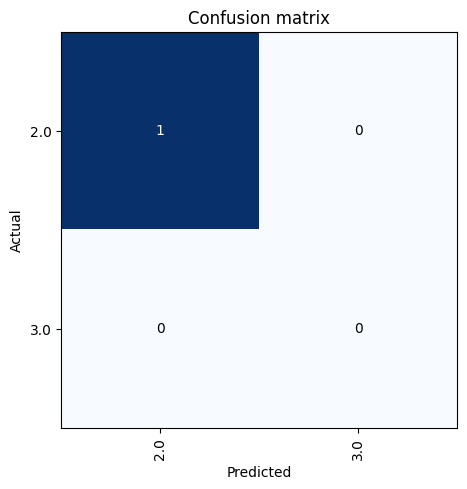

In [280]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [281]:
interp.most_confused(min_val=3)

[]

In [283]:
# Labelled test data
test_ds = valid_dl.dataset.add_test(Joined_test_X, Joined_test_Y)# In this case I'll use X and y, but this would be your test data
test_dl = valid_dl.new(test_ds)
next(iter(test_dl))

(TSTensor(samples:1, vars:13, len:5, device=cpu, dtype=torch.float32),
 TensorCategory([0]))

In [284]:
test_probas, test_targets, test_preds = learn.get_preds(dl=test_dl, with_decoded=True, save_preds=None, save_targs=None)
test_probas, test_targets, test_preds

(tensor([[5.8106e-01, 4.1894e-01],
         [6.5690e-01, 3.4310e-01],
         [9.9432e-01, 5.6828e-03],
         [7.4704e-01, 2.5296e-01],
         [7.2931e-01, 2.7069e-01],
         [7.2138e-01, 2.7862e-01],
         [6.2614e-01, 3.7386e-01],
         [4.8464e-01, 5.1536e-01],
         [7.3154e-01, 2.6846e-01],
         [5.2530e-01, 4.7470e-01],
         [8.6010e-01, 1.3990e-01],
         [7.2461e-01, 2.7539e-01],
         [9.7437e-01, 2.5625e-02],
         [6.3789e-01, 3.6211e-01],
         [9.7460e-01, 2.5398e-02],
         [9.8604e-01, 1.3965e-02],
         [7.7468e-01, 2.2532e-01],
         [1.0000e+00, 4.6474e-06],
         [5.0946e-01, 4.9054e-01]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [285]:
print(f'accuracy: {skm.accuracy_score(test_targets, test_preds):10.6f}')

accuracy:   0.947368
